In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

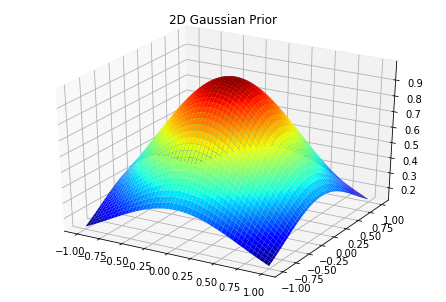

In [2]:
w1=np.linspace(-1,1, num=100)
w2=np.linspace(-1,1, num=100)

w1, w2 = np.meshgrid(w1, w2)

z = np.exp(-w1**2-w2**2)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(w1,w2,z, cmap=plt.cm.jet)
plt.title('2D Gaussian Prior')
plt.show()


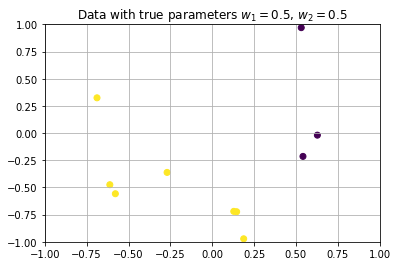

In [29]:
N= 10
x1 = np.random.uniform(-1,1,size=N) #[-0.7,0.7]
x2 = np.random.uniform(-1,1,size=N) #[-0.7,0.7]
y= np.zeros_like(x1)
for i in range(len(x1)):
    if x1[i]+x2[i]>0:
        y[i] = 0
    else: 
        y[i] = 1
plt.figure()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(x1,x2, c=y)
plt.grid()
plt.title('Data with true parameters $w_1 = 0.5$, $w_2=0.5$')
plt.show()

In [30]:
def sigmoid(x,w):
    return 1/(1+np.exp(-w.dot(x)))

In [60]:
w1_p = np.linspace(-5,5, num=100)
w2_p = np.linspace(-5,5, num=100)
z_p = z.copy()
for i in range(100):
    #if i%10==0:
    #    print(i)
    for j in range(100):
        w = np.array([w1_p[i],w2_p[j]])
        for k in range(len(y)):
            x = np.array([x1[k], x2[k]])
            if y[k] == 0:
                z_p[i,j]*= sigmoid(x,w)
            else:
                z_p[i,j]*= 1-sigmoid(x,w)


In [55]:
w1_p = np.linspace(-5,15, num=200)
w2_p = np.linspace(-5,15, num=200)
z_2= np.zeros_like(z)+1
for i in range(100):
    #if i%10==0:
    #    print(i)
    for j in range(100):
        w = np.array([w1_p[i],w2_p[j]])
        for k in range(len(y)):
            x = np.array([x1[k], x2[k]])
            if y[k] == 0:
                z_2[i,j]*= sigmoid(x,w)
            else:
                z_2[i,j]*= 1-sigmoid(x,w)

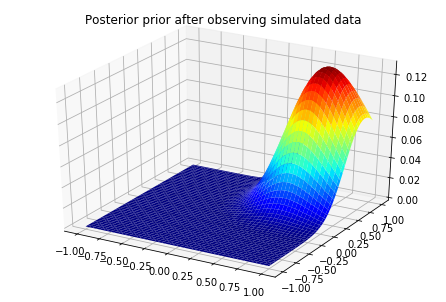

In [61]:
fig = plt.figure()
ax2 = Axes3D(fig)
ax2.plot_surface(w1,w2,z_p, cmap=plt.cm.jet)
plt.title('Posterior prior after observing simulated data')
plt.show()

In [38]:
np.where(z_p==z_p.max())

(array([89]), array([88]))

In [59]:
np.where(z_2==z_2.max())

(array([99]), array([99]))

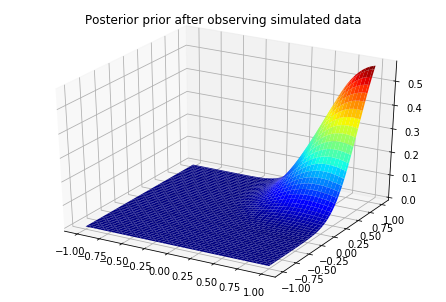

In [58]:
fig = plt.figure()
ax2 = Axes3D(fig)
w1_p, w2_p = np.meshgrid(w1_p, w2_p)
ax2.plot_surface(w1,w2,z_2, cmap=plt.cm.jet)
plt.title('Posterior prior after observing simulated data')
plt.show()

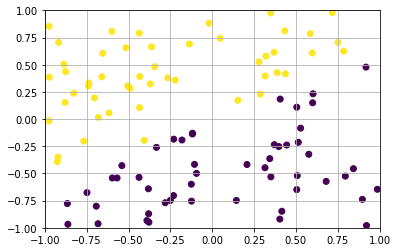

In [206]:
for i in range(len(x1)):
    if -1.03*x1[i]+1.5*x2[i]>0:
        y[i] = 1
    else: 
        y[i] = 0
plt.figure()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(x1,x2, c=y)
plt.grid()
plt.show()

In [330]:
sigmoid(np.array([0.5,0.5]),np.array([1,1]))

0.7310585786300049